In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# install gmaps first from command prompt <pip intall gmaps>
import gmaps
# install citipy first from command prompt <pip install citipy>
from citipy import citipy
from datetime import datetime
import csv

# Import OpenWeatherMap API key
from api_keys import api_key
#gkey = ""

weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={api_key}&units={units}&q="

# Import GoogleMap API key
#from api_keys import api_key1

# Import CSV files
final_df_csv = "totest1.csv"
final_df = pd.read_csv(final_df_csv, low_memory=False)
final_df.drop(['Unnamed: 0','Balls'],axis=1,inplace=True)


In [2]:
pd.set_option("display.max_columns",30)
final_df.head()

,BreakAngle,Result,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH)
0,-25.0,Strike,84.1,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
1,-40.7,Strike,84.1,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
2,-43.7,Strike,85.2,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
3,-1.3,Ball,84.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
4,18.4,Ball,69.6,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7


In [3]:
stadium_summary = final_df.groupby(['Stadium']).mean().reset_index()

In [4]:
stadium_summary.dropna(subset=['BreakAngle'], inplace = True)

In [5]:
stadium_summary.sort_values(['Wind_Speed(MPH)'],ascending=False,inplace=True)
stadium_summary.head()

,Stadium,BreakAngle,Velocity,Nasty,Temp,Wind_Speed(MPH)
0,AT&T Park,2.677133,81.159866,44.518900,63.495641,13.245275
12,Fenway Park,1.067658,80.926224,44.749939,69.372361,11.633037
24,Oakland Coliseum,6.198261,81.348120,43.809771,66.919752,11.150292
23,O.co Coliseum,1.371137,80.852032,45.667081,65.174504,11.126538
6,Citi Field,10.152064,81.644156,44.456457,73.000601,10.708545


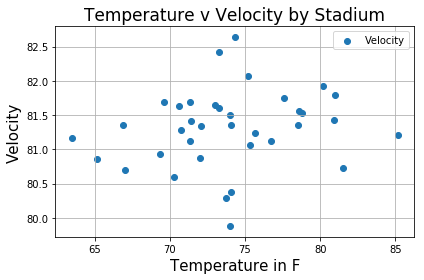

In [6]:
x= stadium_summary['Wind_Speed(MPH)']
y= stadium_summary['Velocity']
z= stadium_summary['BreakAngle']
w= stadium_summary['Nasty']
v= stadium_summary['Temp']

plt.scatter(v,y)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.ylabel('Velocity', fontsize = 15) #for y label
plt.xlabel('Temperature in F', fontsize = 15) #for x label
plt.title('Temperature v Velocity by Stadium',fontsize =17)
plt.tight_layout()
plt.savefig("Temperature v Velocity (Stadium Averages).png")
plt.show()

In [7]:
import seaborn as sns

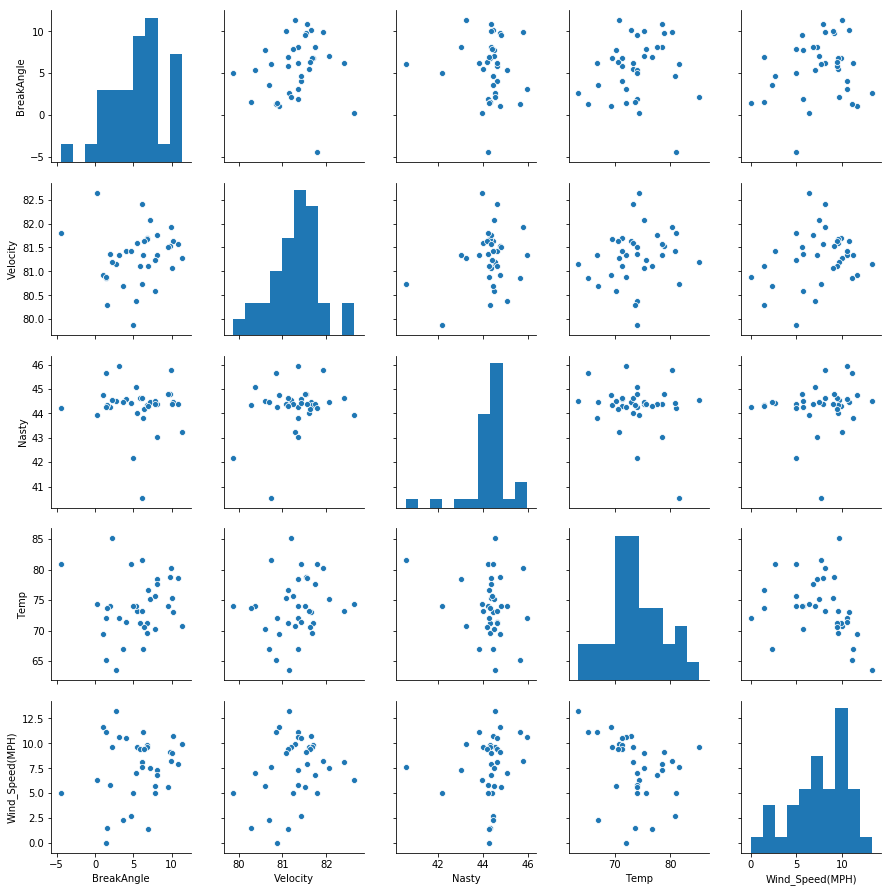

In [8]:
sns.pairplot(stadium_summary)

In [9]:
final_df.head()

,BreakAngle,Result,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH)
0,-25.0,Strike,84.1,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
1,-40.7,Strike,84.1,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
2,-43.7,Strike,85.2,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
3,-1.3,Ball,84.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
4,18.4,Ball,69.6,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7


In [10]:
new = final_df["Date"].str.split("-", n=2,expand=True)
final_df['year']=new[0]
final_df['month']=new[1]
final_df.head()

,BreakAngle,Result,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH),year,month
0,-25.0,Strike,84.1,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
1,-40.7,Strike,84.1,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
2,-43.7,Strike,85.2,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
3,-1.3,Ball,84.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04
4,18.4,Ball,69.6,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7,2015,04


In [11]:
month_pitch = final_df.groupby(['TypeofPitch','month'])['Velocity','Temp'].mean()
month_pitch.head(10)

Velocity       Temp
TypeofPitch month                      
 Changeup   03     77.065523  63.506318
            04     77.055255  63.395240
            05     77.221763  69.644799
            06     77.415358  75.920810
            07     77.474643  79.298195
            08     77.381743  78.429137
            09     77.502790  74.879854
            10     77.018218  67.280060
 Curveball  03     71.764334  65.033860
            04     71.467695  63.109025

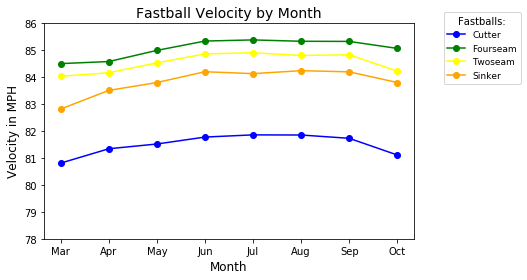

In [12]:
Cutter_df = month_pitch.loc[[' Cutter']].reset_index()
x=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
a=Cutter_df['Velocity']
Fourseam_df = month_pitch.loc[[' Fourseam Fastball']].reset_index()
b=Fourseam_df['Velocity']
Twoseam_df = month_pitch.loc[[' Twoseam Fastball']].reset_index()
c=Twoseam_df['Velocity']
Sinker_df = month_pitch.loc[[' Sinker']].reset_index()
d=Sinker_df['Velocity']

plt.title('Fastball Velocity by Month',fontsize=14,fontweight=3)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Velocity in MPH",fontsize=12)
plt.ylim(78,86)
plt.plot(x,a, marker='o',color='blue',label='Cutter')
plt.plot(x,b, marker='o',color='green',label='Fourseam')
plt.plot(x,c, marker='o',color='yellow',label='Twoseam')
plt.plot(x,d, marker='o',color='orange',label='Sinker')
plt.tight_layout()
plt.legend(loc=4,title="Fastballs:",fontsize=9,bbox_to_anchor=(1.3,0.7))
plt.savefig("Fastball Velocity by Month.png")
plt.show()

In [13]:
pitch_break = final_df.groupby(['TypeofPitch'])['BreakAngle'].mean().reset_index().sort_values('BreakAngle')
misc = final_df.groupby(['TypeofPitch'])['Velocity'].mean().reset_index()
pitch_break.drop([14,16,15,8,5],inplace=True)
pitch_break = pd.merge(pitch_break,misc,how='inner',on='TypeofPitch')
pitch_break

,TypeofPitch,BreakAngle,Velocity
0,Screwball,-21.950442,72.196460
1,Knuckle curve,-6.058107,74.348603
2,Curveball,-5.291870,72.005719
3,Eephus,-5.257914,61.752270
4,Cutter,-4.800487,81.674904
5,Slider,-4.655388,78.133095
6,Knuckeball,0.405648,69.369476
7,Changeup,6.458895,77.339375
8,Sinker,9.021240,84.011177
9,Fourseam Fastball,11.083392,85.171346


In [14]:
pitch_break.to_csv("Pitch Break.csv")

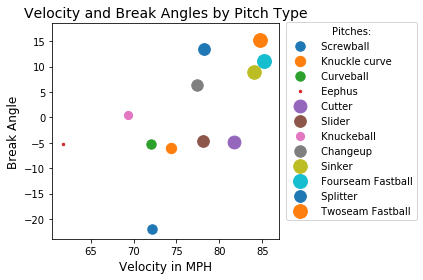

In [15]:
pitches=list(pitch_break['TypeofPitch'].unique())
Velocity = pitch_break['Velocity']
Break = pitch_break['BreakAngle']
label = pitch_break['TypeofPitch']
for item in range(len(pitches)):
    plt.scatter(Velocity[item],Break[item],label=label[item],s=(Velocity[item]-61)*8)
plt.legend(title = 'Pitches:',bbox_to_anchor=(1.01,1.03))
plt.title("Velocity and Break Angles by Pitch Type",fontsize=14)
plt.xlabel("Velocity in MPH",fontsize=12)
plt.ylabel("Break Angle", fontsize =12)
plt.tight_layout()
plt.savefig("Velocity and Break Angle by Pitch.png")
plt.show()

In [16]:
pitch_result = final_df.groupby(['month','TypeofPitch'])['Strike/Ball/X'].count().reset_index()
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Intentional ball']
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Unknown']
pitch_result = pitch_result[pitch_result['TypeofPitch']!='FA']
pitch_result = pitch_result[pitch_result['TypeofPitch']!='AB']
pitch_result = pitch_result[pitch_result['TypeofPitch']!=' Pitchout']
pitch_result

,month,TypeofPitch,Strike/Ball/X
0,03,Changeup,1108
1,03,Curveball,886
2,03,Cutter,579
3,03,Eephus,1
4,03,Fourseam Fastball,4151
5,03,Knuckle curve,308
7,03,Sinker,1012
8,03,Slider,2060
9,03,Splitter,209
10,03,Twoseam Fastball,1370


In [17]:
pitch_result_sum = pitch_result.groupby(['month']).sum().reset_index()
pitch_result_sum

,month,Strike/Ball/X
0,03,11684
1,04,418059
2,05,491972
3,06,474206
4,07,442394
5,08,493728
6,09,483308
7,10,29912


In [18]:
pitch_result = pd.merge(pitch_result,pitch_result_sum,how='inner',on='month')
pitch_result['Pitch_Ratio']=pitch_result['Strike/Ball/X_x']/pitch_result['Strike/Ball/X_y']*100

In [19]:
pitch_result = pitch_result[['month','TypeofPitch','Pitch_Ratio']]

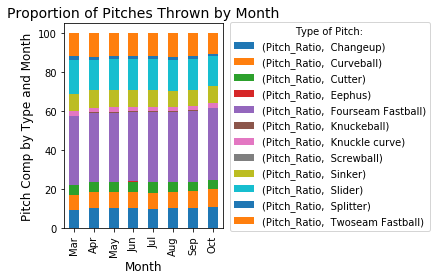

In [20]:
pitch_result.groupby(['month','TypeofPitch']).sum().unstack().plot(kind='bar',stacked=True)
plt.legend(title = 'Type of Pitch:',bbox_to_anchor=(1.01,1.03), ncol=1, fontsize=10)
plt.title('Proportion of Pitches Thrown by Month',fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Pitch Comp by Type and Month', fontsize=12)
Month=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
plt.xticks(np.arange(8),('Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'),rotation=90)

plt.tight_layout()
plt.savefig("Pitch Comp by Type and Month.png")
plt.show()

In [21]:
proportion_df = pitch_result.reset_index()
proportion_df= proportion_df.groupby(['TypeofPitch','month'])['Pitch_Ratio'].sum()
proportion_df

TypeofPitch        month
 Changeup          03        9.483054
                   04       10.532963
                   05       10.469295
                   06       10.105946
                   07        9.979566
                   08       10.279547
                   09       10.346611
                   10       11.065793
 Curveball         03        7.583020
                   04        7.784308
                   05        7.891099
                   06        8.295340
                   07        8.198122
                   08        8.510759
                   09        8.652454
                   10        9.016448
 Cutter            03        4.955495
                   04        5.521469
                   05        5.386485
                   06        5.499087
                   07        5.437009
                   08        5.047111
                   09        4.801493
                   10        4.476464
 Eephus            03        0.008559
                   04    

In [22]:
otherdf = proportion_df.reset_index()
proportion_df1 = list(otherdf['TypeofPitch'].unique())

In [23]:
Eephus = proportion_df.loc[[' Eephus']].reset_index()
Eephus

,TypeofPitch,month,Pitch_Ratio
0,Eephus,03,0.008559
1,Eephus,04,0.028704
2,Eephus,05,0.026018
3,Eephus,06,0.045128
4,Eephus,07,0.028255
5,Eephus,08,0.023900
6,Eephus,09,0.022553


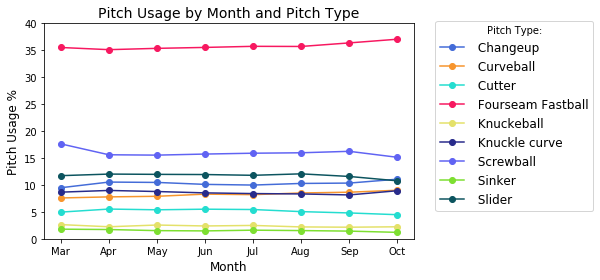

In [24]:
proportion_df1
date_list=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']

Changeup = proportion_df.loc[[' Changeup']].reset_index()
Curveball = proportion_df.loc[[' Curveball']].reset_index()
Cutter = proportion_df.loc[[' Cutter']].reset_index()
Eephus = proportion_df.loc[[ ' Eephus']].reset_index()
Fourseam = proportion_df.loc[[' Fourseam Fastball']].reset_index()
Knuckle = proportion_df.loc[[' Knuckle curve']].reset_index()
Sinker = proportion_df.loc[[' Sinker']].reset_index()
Slider = proportion_df.loc[[ ' Slider']].reset_index()
Splitter = proportion_df.loc[[' Splitter']].reset_index()
Twoseam = proportion_df.loc[[ ' Twoseam Fastball']].reset_index()
Knuckleball = proportion_df.loc[[ ' Knuckeball']].reset_index()
Screwball = proportion_df.loc[[' Screwball']].reset_index()

a=Changeup['Pitch_Ratio']
b=Curveball['Pitch_Ratio']
c=Cutter['Pitch_Ratio']
d=Eephus['Pitch_Ratio']
e=Fourseam['Pitch_Ratio']
f=Knuckle['Pitch_Ratio']
g=Sinker['Pitch_Ratio']
h=Slider['Pitch_Ratio']
i=Splitter['Pitch_Ratio']
j=Twoseam['Pitch_Ratio']
k=Knuckleball['Pitch_Ratio']
l=Screwball['Pitch_Ratio']

plt.title('Pitch Usage by Month and Pitch Type',fontsize=14,fontweight=3)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Pitch Usage %",fontsize=12)
plt.ylim(0,40)
plt.plot(date_list,a, marker='o',color=np.random.random(3),label=proportion_df1[0])
plt.plot(date_list,b, marker='o',color=np.random.random(3),label=proportion_df1[1])
plt.plot(date_list,c, marker='o',color=np.random.random(3),label=proportion_df1[2])
#lt.plot(date_list,d, marker='o',color=np.random.random(3),label=proportion_df1[3])
plt.plot(date_list,e, marker='o',color=np.random.random(3),label=proportion_df1[4])
plt.plot(date_list,f, marker='o',color=np.random.random(3),label=proportion_df1[5])
plt.plot(date_list,g, marker='o',color=np.random.random(3),label=proportion_df1[6])
plt.plot(date_list,h, marker='o',color=np.random.random(3),label=proportion_df1[7])
plt.plot(date_list,i, marker='o',color=np.random.random(3),label=proportion_df1[8])
plt.plot(date_list,j, marker='o',color=np.random.random(3),label=proportion_df1[9])
#lt.plot(date_list,k, marker='o',color=np.random.random(3),label=proportion_df1[10])
#lt.plot(date_list,l, marker='o',color=np.random.random(3),label=proportion_df1[11])

plt.tight_layout()
plt.legend(loc=4,title="Pitch Type:",fontsize=12,bbox_to_anchor=(1.5,0.1))
plt.savefig("Pitch Usage by Type and Month.png")
plt.show()